NAMA: M. DIVO TRINANDA                                                                                                          
NIM: 09011381722103                                                                                                             
KELAS: SK5 BUKIT

# PENERAPAN LOGIKA FUZZY PADA CONTROL SUARA TV SEBAGAI ALTERNATIVE MENGHEMAT DAYA LISTRIK 

Televisi merupakan media elektronik yang banyak digunakan masyarakat sebagai media hiburan dirumah. Televisi juga sebagai media pandang sekaligus media pendengar (audio-visual). Banyak pengoprasian televisi salahsatunya pengaturan suara. Saat ini, untuk memperbesar suara televisi menggunakan remote control. Hal ini dirasa kurang efektif karena akan sering diubah apabila penonton dalam jumlah banyak dan harus mengurangi suara televisi apabila kondisinya hening seperti saat tidur. Penggunaan suara televisi yang cukup besar >=75 dB dapat mengkonsumsi daya listrik cukup besar yaitu 120 watt

Maka dari itu diperlukan metode yang diharapkan mampu memberikan kemudahan penonton dalam mengatur volume televisi dan mengurangi konsumsi penggunaan listrik untuk itu diperlukan logika salah satunya logika fuzzy  yang mengatur suara televisi dengan mengambil input dari suara disekitar televisi.

Data input penelitian ini diambil menggunakan sensor suara. Sensor ini akan mengambil suara kebisingan dengan satuan desible (Db) dan hertz (Hz) yang akan diolah menggunakan logika fuzzy menghasilkan volume televisi secara otomatis .

# I. METODE FUZZY YANG DIGUNAKAN

Metode fuzzy yang digunakan adalah Mamdani. Langkah-langkah dalam metode mamdani, antara lain:  
1. Pembentukan Himpunan Fuzzy
2. Aplikasi Fungsi Implikasi
3. Komposisi Aturan
4. Defuzifikasi

# II. PENYELESAIAN DENGAN PYTHON

- Import Library

In [18]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

### 1. Pembentukan Himpunan Fuzzy :
    Proses fuzzifikasi merupakan proses konversi Input ke dalam bentuk (fuzzy) variabel linguistik menggunakan fungsi keanggotaan.
    
    Dalam kasus ini terdapat 2 Himpunan Input dengan 3 Variabel dan 1 Himpunan dengan 3 Variabel Output, yaitu :
    
- Input :
    - Frekuensi : {Rendah, Sedang, Tinggi}
    - Desibel     : {Rendah, Sedang, Tinggi}

- Output :
    - Volume : {Rendah, Sedang, Tinggi}


### Fuzzifikasi Frekuensi

In [19]:
Frekuensi = ctrl.Antecedent(np.arange(0,21000,1), 'Frekuensi')
X_Frekuensi = np.arange(0,21000,1) #untuk plotting saja

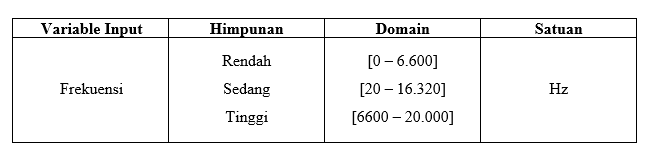

## Nilai Linguistik Frekuensi

Dengan fungsi keanggotaan Frekuensi

\begin{equation}
  Frekuensi['Rendah'] = \mu FrekunesiRendah(x)=\begin{cases}
    0, & \text{$f\leq 0$ atau $f\geq6600$}.\\
    (f - 0)/(20 - 0) , & \text{$0 \leq f \leq 20$}.\\
   (6600 - f)/(6600 - 20) , & \text{$20 \leq f \leq 6600$}.\\
  \end{cases}
  \\
  Frekuensi['Sedang'] = \mu FrekuensiSedang(x)=\begin{cases}
    0, & \text{$f\leq 20$ atau $f\geq16320$}.\\
    (f - 20)/(6600 - 20) , & \text{$20 \leq f \leq 6600$}.\\
    (16320 - f)/(16320 - 6600) , & \text{$6600 \leq f \leq 16320$}.\\
  \end{cases}
  \\
    Frekuensi ['Tinggi'] = \mu FrekuensiTinggi(x)=\begin{cases}
    0, & \text{$f\leq 6600$ atau $f\geq20000$}.\\
    (f-6600)/(16320 - 6600) , & \text{$6600 \leq f \leq 16320$}.\\
    (20000 - f)/(20000 - 16320) , & \text{$16320 \leq f \leq 20000$}.\\
  \end{cases}
\end{equation}



## Plotting Membership Function Frekuensi

In [20]:
Frekuensi['Rendah'] = fuzz.trimf(Frekuensi.universe, [0,20,6600])

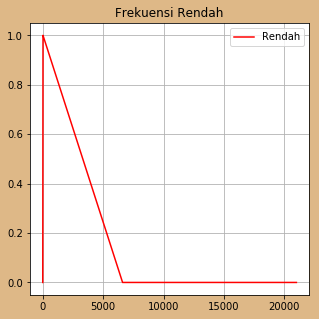

In [92]:
fig, (ax0) = plt.subplots(nrows= 1 ,facecolor='burlywood', figsize=(5, 5))
Frekuensi_Rendah = fuzz.trimf(X_Frekuensi,[0,20,6600])
ax0.plot(Frekuensi.universe, Frekuensi_Rendah, 'red', linewidth=1.5, label='Rendah')
ax0.set_title('Frekuensi Rendah')
ax0.grid()
ax0.legend()

Plot fungsi keanggotaan $\mu Frekuensi Rendah(x) $

In [22]:
Frekuensi['Sedang'] = fuzz.trimf(Frekuensi.universe, [20,6600,16320])

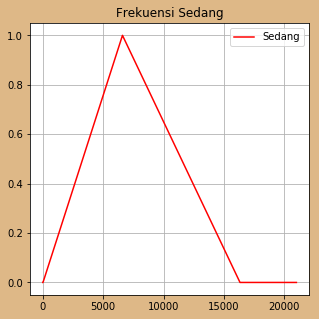

In [93]:
fig, (ax0) = plt.subplots(nrows= 1 ,facecolor='burlywood', figsize=(5, 5))
Frekuensi_Sedang = fuzz.trimf(Frekuensi.universe, [20,6600,16320])
ax0.plot(Frekuensi.universe, Frekuensi_Sedang, 'red', linewidth=1.5, label='Sedang')
ax0.set_title('Frekuensi Sedang')
ax0.grid()
ax0.legend()

Plot fungsi keanggotaan $\mu Frekuensi Sedang(x) $

In [58]:
Frekuensi['Tinggi'] = fuzz.trimf(Frekuensi.universe, [6600,16320,20000])

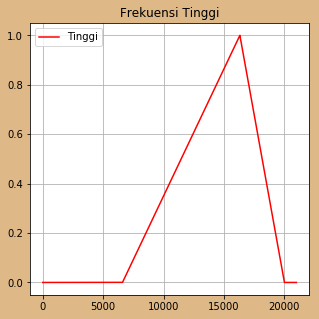

In [95]:
fig, (ax0) = plt.subplots(nrows= 1 ,facecolor='burlywood', figsize=(5, 5))
Frekuensi_Tinggi = fuzz.trimf(Frekuensi.universe, [6600,16320,20000])
ax0.plot(Frekuensi.universe, Frekuensi_Tinggi, 'red', linewidth=1.5, label='Tinggi')
ax0.set_title('Frekuensi Tinggi')
ax0.grid()
ax0.legend()

Plot fungsi keanggotaan $\mu Frekuensi Tinggi(x) $

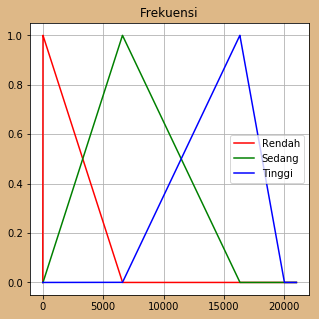

In [94]:
#Menampilkan gabungan dari fungsi keanggotaan Frekuensi
fig, (ax0) = plt.subplots(nrows= 1 ,facecolor='burlywood', figsize=(5, 5))
ax0.plot(Frekuensi.universe, Frekuensi_Rendah, 'red', linewidth=1.5, label='Rendah')
ax0.plot(Frekuensi.universe, Frekuensi_Sedang, 'green', linewidth=1.5, label='Sedang')
ax0.plot(Frekuensi.universe, Frekuensi_Tinggi, 'blue', linewidth=1.5, label='Tinggi')
ax0.set_title('Frekuensi')
ax0.grid()
ax0.legend()

Plotting ketiga fungsi keanggotaan Frekuensi

## Fuzzifikasi Desible

In [27]:
Desible = ctrl.Antecedent(np.arange(0,110,0.1), 'Desible')

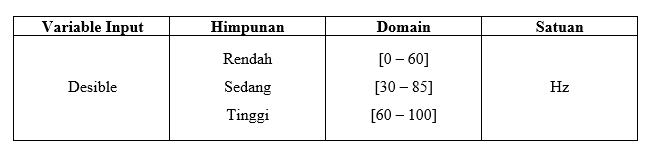

## Nilai Linguistik Desible
Dengan fungsi keanggotaan Desible

\begin{equation}
  Desible['Rendah'] = \mu DesibleRendah(x)=\begin{cases}
    0, & \text{$d\leq 0$ atau $d\geq60$}.\\
    (d - 0)/(30 - 0) , & \text{$0 \leq d \leq 30$}.\\
   (60 - d)/(60 - 30) , & \text{$30 \leq d \leq 60$}.\\
  \end{cases}
  \\
  Desible['Sedang'] = \mu DesibleSedang(x)=\begin{cases}
    0, & \text{$d\leq 30$ atau $d\geq85$}.\\
    (d - 30)/(60 - 30) , & \text{$30 \leq d \leq 60$}.\\
    (85 - d)/(60 - 30) , & \text{$60 \leq d \leq 85$}.\\
  \end{cases}
  \\
    Desible['Tinggi'] = \mu DesibleTinggi(x)=\begin{cases}
    0, & \text{$d\leq 60$ atau $d\geq100$}.\\
    (d-60)/(85 - 60) , & \text{$60 \leq d \leq 85$}.\\
    (100 - d)/(100 - 85) , & \text{$85 \leq d \leq 100$}.\\
  \end{cases}
\end{equation}



## Plotting Membership Function Desible

In [28]:
Desible['Rendah'] = fuzz.trimf(Desible.universe,[0,30,60])

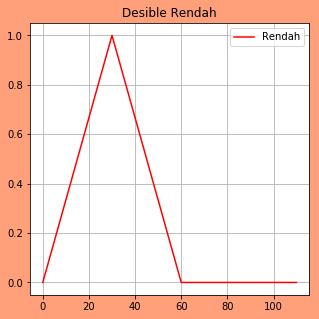

In [29]:
fig, (ax0) = plt.subplots(nrows= 1 ,facecolor='lightsalmon', figsize=(5, 5))
Desible_Rendah = fuzz.trimf(Desible.universe,[0,30,60])
ax0.plot(Desible.universe, Desible_Rendah, 'red', linewidth=1.5, label='Rendah')
ax0.set_title('Desible Rendah')
ax0.grid()
ax0.legend()

Plot fungsi keanggotaan $\mu Desible Rendah(x) $

In [30]:
Desible['Sedang'] = fuzz.trimf(Desible.universe,[30,60,85])

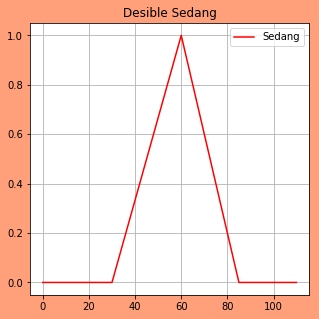

In [32]:
fig, (ax0) = plt.subplots(nrows= 1 ,facecolor='lightsalmon', figsize=(5, 5))
Desible_Sedang = fuzz.trimf(Desible.universe,[30,60,85])
ax0.plot(Desible.universe, Desible_Sedang, 'red', linewidth=1.5, label='Sedang')
ax0.set_title('Desible Sedang')
ax0.grid()
ax0.legend()

Plot fungsi keanggotaan $\mu Desible Sedang(x) $

In [46]:
Desible['Tinggi'] = fuzz.trimf(Desible.universe,[60,85,100])

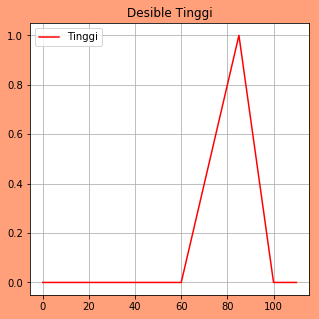

In [47]:
fig, (ax0) = plt.subplots(nrows= 1 ,facecolor='lightsalmon', figsize=(5, 5))
Desible_Tinggi = fuzz.trimf(Desible.universe,[60,85,100])
ax0.plot(Desible.universe, Desible_Tinggi, 'red', linewidth=1.5, label='Tinggi')
ax0.set_title('Desible Tinggi')
ax0.grid()
ax0.legend()

Plot fungsi keanggotaan $\mu Desible Tinggi(x) $

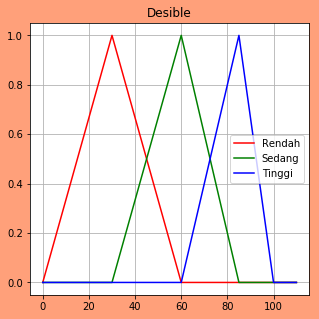

In [48]:
#Menampilkan gabungan dari fungsi keanggotaan Desible
fig, (ax0) = plt.subplots(nrows= 1 ,facecolor='lightsalmon', figsize=(5, 5))
ax0.plot(Desible.universe, Desible_Rendah, 'red', linewidth=1.5, label='Rendah')
ax0.plot(Desible.universe, Desible_Sedang, 'green', linewidth=1.5, label='Sedang')
ax0.plot(Desible.universe, Desible_Tinggi, 'blue', linewidth=1.5, label='Tinggi')
ax0.set_title('Desible')
ax0.grid()
ax0.legend()

Plotting ketiga fungsi keanggotaan Desible

# Membership Function untuk Himpunan Output
## Fuzzifikasi Volume

- output Volume = range(0 - 100)

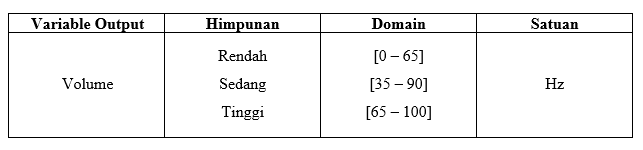

## Nilai Linguistik Volume
Dengan fungsi keanggotaan Volume

\begin{equation}
  Volume['Rendah'] = \mu VolumeRendah(v)=\begin{cases}
    0, & \text{$d\leq 0$ atau $d\geq65$}.\\
    (v - 0)/(35 - 0) , & \text{$0 \leq v \leq 35$}.\\
   (65 - v)/(65 - 35) , & \text{$35 \leq v \leq 65$}.\\
  \end{cases}
  \\
  Volume['Sedang'] = \mu VolumeSedang(v)=\begin{cases}
    0, & \text{$d\leq 30$ atau $d\geq85$}.\\
    (v - 35)/(65 - 35) , & \text{$35 \leq v \leq 65$}.\\
    (90 - v)/(90 - 65) , & \text{$65 \leq v \leq 90$}.\\
  \end{cases}
  \\
    Volume['Tinggi'] = \mu VolumeTinggi(v)=\begin{cases}
    0, & \text{$d\leq 65$ atau $d\geq100$}.\\
    (v-65)/(90 - 65) , & \text{$65 \leq v \leq 90$}.\\
    (100 - v)/(100 - 90) , & \text{$90 \leq v \leq 100$}.\\
  \end{cases}
\end{equation}



## Plotting Membership Function Volume

In [49]:
Volume = ctrl.Consequent(np.arange(0,110,1), 'Volume')

In [50]:
Volume['Rendah'] = fuzz.trimf(Volume.universe,[0,35,65])

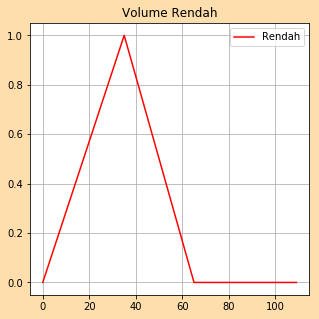

In [82]:
fig, (ax0) = plt.subplots(nrows= 1 ,facecolor='navajowhite', figsize=(5, 5))
Volume_Rendah = fuzz.trimf(Volume.universe,[0,35,65])
ax0.plot(Volume.universe, Volume_Rendah, 'red', linewidth=1.5, label='Rendah')
ax0.set_title('Volume Rendah')
ax0.grid()
ax0.legend()

Plot fungsi keanggotaan $\mu Volume Rendah(x) $

In [52]:
Volume['Sedang'] = fuzz.trimf(Volume.universe,[35,65,90])

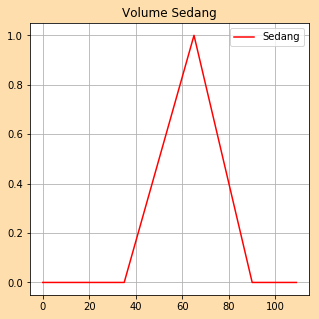

In [83]:
fig, (ax0) = plt.subplots(nrows= 1 ,facecolor='navajowhite', figsize=(5, 5))
Volume_Sedang = fuzz.trimf(Volume.universe,[35,65,90])
ax0.plot(Volume.universe, Volume_Sedang, 'red', linewidth=1.5, label='Sedang')
ax0.set_title('Volume Sedang')
ax0.grid()
ax0.legend()

Plot fungsi keanggotaan $\mu Volume Sedang(x) $

In [54]:
Volume['Tinggi'] = fuzz.trimf(Volume.universe,[65,90,100])

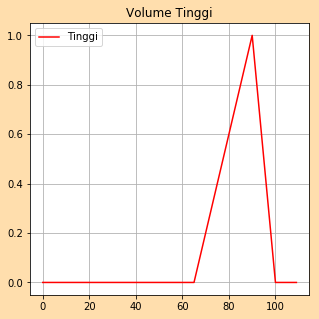

In [84]:
fig, (ax0) = plt.subplots(nrows= 1 ,facecolor='navajowhite', figsize=(5, 5))
Volume_Tinggi = fuzz.trimf(Volume.universe,[65,90,100])
ax0.plot(Volume.universe, Volume_Tinggi, 'red', linewidth=1.5, label='Tinggi')
ax0.set_title('Volume Tinggi')
ax0.grid()
ax0.legend()

Plot fungsi keanggotaan $\mu Volume Tinggi(x) $

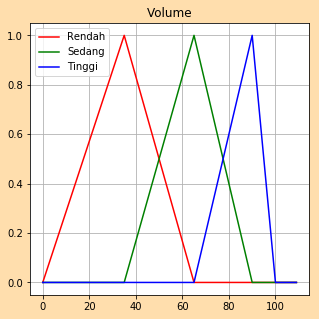

In [85]:
#Menampilkan gabungan dari fungsi keanggotaan Volume
fig, (ax0) = plt.subplots(nrows= 1 ,facecolor='navajowhite', figsize=(5, 5))
ax0.plot(Volume.universe, Volume_Rendah, 'red', linewidth=1.5, label='Rendah')
ax0.plot(Volume.universe, Volume_Sedang, 'green', linewidth=1.5, label='Sedang')
ax0.plot(Volume.universe, Volume_Tinggi, 'blue', linewidth=1.5, label='Tinggi')
ax0.set_title('Volume')
ax0.grid()
ax0.legend()

Plotting ketiga fungsi keanggotaan Frekuensi

# Sistem Inferensi - Rule Base

Proses ini merupakan proses konversi input-fuzzy menggunakan aturan-aturan "IF - THEN" menjadi output-fuzzy. Dikarenakan inputan > 1, maka untuk penggabungan antar 2 atau lebih input dapat digunakan fungsi "&" = AND atau "|" = OR, sehingga tujuan penggabungan data menjadi jelas.

Keputusan dari implementasi fuzzy berasal dari rule-rule yang ada pada basis data.

Rule yang digunakan pada kasus ini untuk mengetahui Volume TV sebanyak 9 Rule dengan 3 Variabel Output : (Rendah, Sedang, Pada sistem ini berdasarkan jumlah fuzzifikasi dari variabel Frekuensi yang berjumlah 3 dan fuzzifikasi dari variabel Desible yang berjumlah 3, maka rule yang dibuat berjumlah 3 x 3 = 9 rule


Rules :

1) IF Frekuensi=Rendah dan Desible=Rendah Then Volume=Rendah.                                                                   
2) IF Frekuensi=Rendah dan Desible=Sedang Then Volume=Sedang.                                                                   
3) IF Frekuensi=Rendah dan Desible=Tinggi Then Volume=Sedang.                                                                   
4) IF Frekuensi=Sedang dan Desible=Rendah Then Volume=Sedang.                                                                   
5) IF Frekuensi=Sedang dan Desible=Sedang Then Volume=Sedang.                                                                   
6) IF Frekuensi=Sedang dan Desible=Tinggi Then Volume=Tinggi.                                                                   
7) IF Frekuensi=Tinggi dan Desible=Rendah Then Volume=Sedang.                                                                   
8) IF Frekuensi=Tinggi dan Desible=Sedang Then Volume=Tinggi.                                                                   
9) IF Frekuensi=Tinggi dan Desible=Tinggi Then Volume=Tinggi.

In [60]:
rule1 = ctrl.Rule(Frekuensi['Rendah'] & Desible['Rendah'], Volume['Rendah'])
rule2 = ctrl.Rule(Frekuensi['Rendah'] & Desible['Sedang'], Volume['Sedang'])
rule3 = ctrl.Rule(Frekuensi['Rendah'] & Desible['Tinggi'], Volume['Sedang'])
rule4 = ctrl.Rule(Frekuensi['Sedang'] & Desible['Rendah'], Volume['Sedang'])
rule5 = ctrl.Rule(Frekuensi['Sedang'] & Desible['Sedang'], Volume['Sedang'])
rule6 = ctrl.Rule(Frekuensi['Sedang'] & Desible['Tinggi'], Volume['Tinggi'])
rule7 = ctrl.Rule(Frekuensi['Tinggi'] & Desible['Rendah'], Volume['Sedang'])
rule8 = ctrl.Rule(Frekuensi['Tinggi'] & Desible['Sedang'], Volume['Tinggi'])
rule9 = ctrl.Rule(Frekuensi['Tinggi'] & Desible['Tinggi'], Volume['Tinggi'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2791fb96518>)

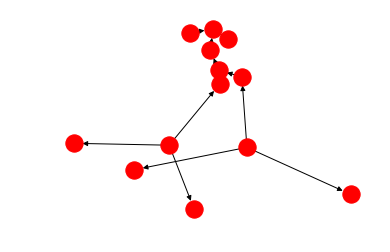

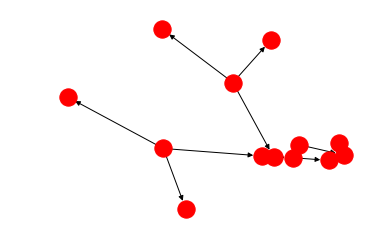

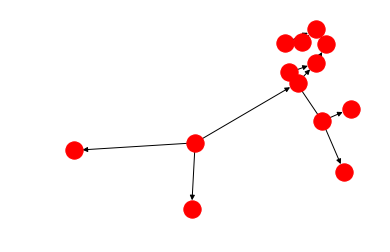

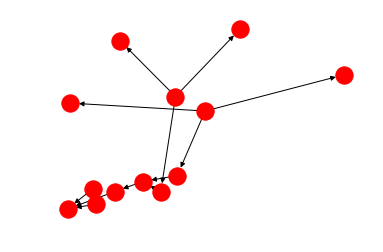

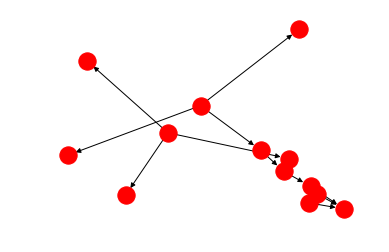

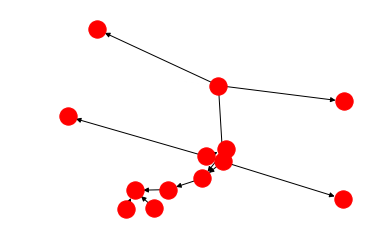

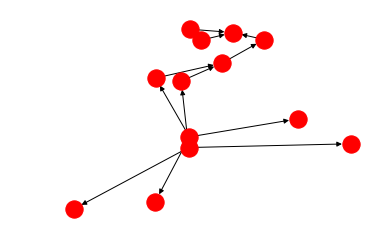

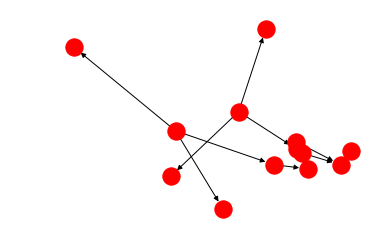

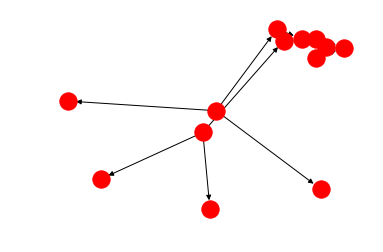

In [61]:
rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27920f1cdd8>)

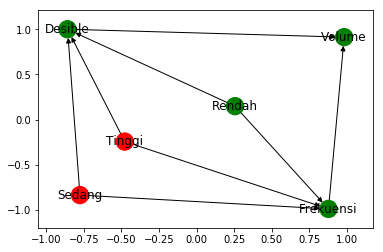

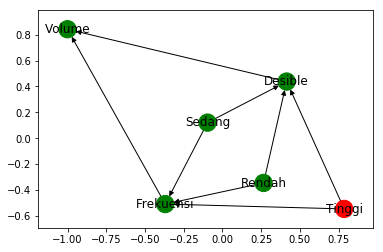

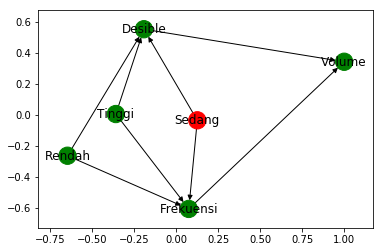

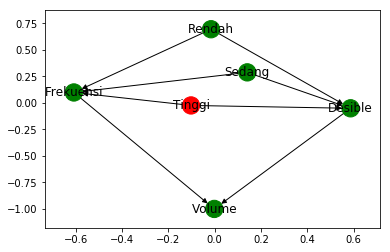

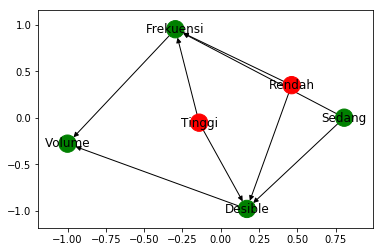

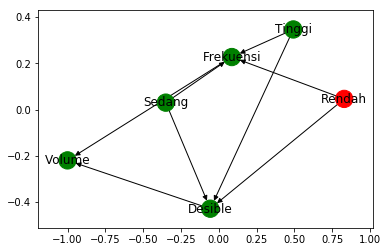

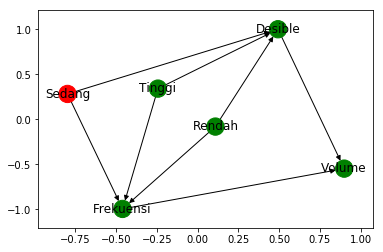

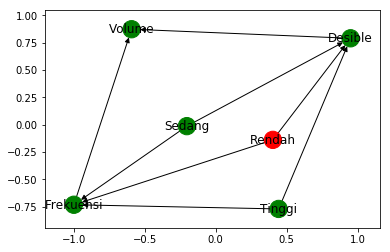

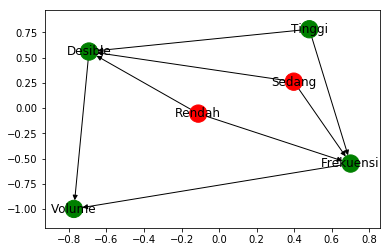

In [62]:
rule1.view_n()
rule2.view_n()
rule3.view_n()
rule4.view_n()
rule5.view_n()
rule6.view_n()
rule7.view_n()
rule8.view_n()
rule9.view_n()

## RULE EVALUATION

In [64]:
VolumeTV_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])

## DEFUZZIFIKASI

In [65]:
VolumeTV = ctrl.ControlSystemSimulation(VolumeTV_ctrl)

Pada Percobaan kali ini nilai input yang digunakan yaitu Frekuensi 10000 Hz dan desible 90 Hz 

In [66]:
VolumeTV.input['Desible'] = 90
VolumeTV.input['Frekuensi'] = 10000

Melakukan perhitungan defuzzifikasi

In [67]:
VolumeTV.compute()

## Mencetak hasil output defuzzifikasi

In [68]:
print(VolumeTV.output['Volume'])

84.54676051390145


C:\Users\Asus\Anaconda3\anaconda\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


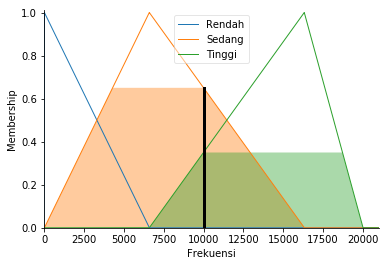

In [69]:
Frekuensi.view(sim=VolumeTV)

C:\Users\Asus\Anaconda3\anaconda\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


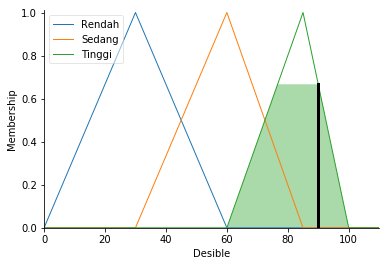

In [70]:
Desible.view(sim=VolumeTV)

C:\Users\Asus\Anaconda3\anaconda\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


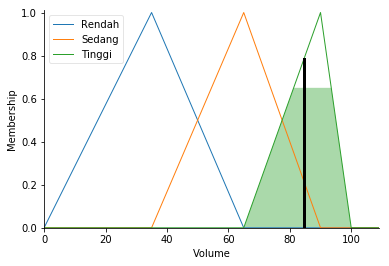

In [71]:
Volume.view(sim=VolumeTV)

# Perhitungan Manual

\begin{equation}
    Frekuensi = 10000 \\
    Masukkan\,nilai\,Frekuensi\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,Frekuensi\\
  Frekuensi['Rendah'] = \mu FrekuensiRendah(f)=\begin{cases}
    0, & \text{$f\leq 0$ atau $f\geq6600$}.\checkmark\\
    (f - 0)/(20 - 0) , & \text{$0 \leq f \leq 20$}.\\
    (6600 - f)/(6600 - 20) , & \text{$20 \leq f \leq 6600$}.
  \end{cases}
  \\
  Frekuensi['Sedang'] = \mu FrekuensiSedang(f)=\begin{cases}
    0, & \text{$f\leq 20$ atau $f\geq16320$}. \\
    (f - 20)/(6600 - 20) , & \text{$20 \leq f \leq 6600$}.\\
    (16320 - f)/(16320 - 6600) , & \text{$6600 \leq f \leq 16320$}.\checkmark\\
  \end{cases}
  \\
    Frekuensi ['Tinggi'] = \mu FrekuensiTinggi(f)=\begin{cases}
    0, & \text{$f\leq 6600$ atau $f\geq20000$}.\\
    (f - 6600)/(16320 - 6600) , & \text{$6600 \leq f \leq 16320$}.\checkmark\\
    (20000 - f)/(20000 - 16320) , & \text{$16320 \leq f \leq 20000$}. \\
  \end{cases}
\end{equation}



\begin{equation}
    \mu FrekuensiSedang(10000) = (16320 - 10000) / (16320-6600) \\
    \mu FrekuensiSedang(10000) = 6320/9720 \\
    \mu FrekuensiSedang(10000) = 0.65 \\
    \mu FrekuensiTinggi(10000) = (10000 - 6600) / (16320 - 6600) \\
    \mu FrekuensiTinggi(10000) = 3400/9720 \\ 
    \mu FrekuensiTinggi(10000) = 0.34 \\
\end{equation}

\begin{equation}
    Desible = 90 \\
    Masukkan\,nilai\,Desible\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,Desible\\
  Desible['Rendah'] = \mu DesibleRendah(d)=\begin{cases}
    0, & \text{$d\leq 0$ atau $d\geq60$}.\checkmark\\
    (d - 0)/(30 - 0) , & \text{$0 \leq d \leq 30$}.\\
    (60 - d)/(60 - 30) , & \text{$30 \leq d \leq 60$}.
  \end{cases}
  \\
  Desible['Sedang'] = \mu DesibleSedang(d)=\begin{cases}
    0, & \text{$d\leq 30$ atau $d\geq85$}. \checkmark\\
    (d - 30)/(60 - 30) , & \text{$30 \leq d \leq 60$}.\\
    (85 - d)/(85 - 60) , & \text{$60 \leq d \leq 85$}.\\
  \end{cases}
  \\
    Desible ['Tinggi'] = \mu DesibleTinggi(f)=\begin{cases}
    0, & \text{$d\leq 60$ atau $d\geq100$}.\\
    (d - 60)/(85 - 60) , & \text{$60 \leq d \leq 85$}.\\
    (100 - d)/(100 - 85) , & \text{$85 \leq d \leq 100$}.\checkmark\\
  \end{cases}
\end{equation}

\begin{equation}
    \mu DesibleTinggi(90) = (100 - 90) / (100-85) \\
    \mu DesibleTinggi(90) = 10/15 \\
    \mu DesibleTinggi(90) = 0.67 \\
\end{equation}

Lalu kita cari nilai z untuk setiap aturan dengan menggunakan fungsi MIN karena menggunakan rule AND

1 IF Frekuensi Rendah AND Desible Rendah THEN Volume Rendah

$$ \\ \alpha(predikat_1) = \mu FrekuensiRendah \cap \mu DesibleRendah $$
$$\alpha(predikat_1)   = min (\mu FrekuensiRendah[6000], \mu DesibleRendah[90]) $$
$$ \alpha(predikat_1) = min (0; 0) $$
$$ \alpha(predikat_1) = 0 $$

Lalu lihat himpunan Volume Rendah 
$$
   Volume['Rendah'] = \mu(v)=\begin{cases}
    0, & \text{$v\leq 0$ atau $v\geq65$}.\\
    \left.(i - 0)\, \right/(35 - 0) , & \text{$0 \leq v \leq 35$}.\\
    \left.(65 - i)\, \right/(65 - 35) , & \text{$35 \leq v \leq 65$}.\\
  \end{cases}
 $$
Maka nilai $ Z_1 = 0 $

=================================================================================================================

2 IF Frekuensi Rendah AND Desible Sedang THEN Volume Sedang

$$ \\ \alpha(predikat_2) = \mu FrekuensiRendah \cap \mu DesibleSedang $$
$$\alpha(predikat_2)   = min (\mu FrekuensiRendah[6000], \mu DesibleSedang[90]) $$
$$ \alpha(predikat_2) = min (0; 0) $$
$$ \alpha(predikat_2) = 0 $$

Lalu lihat himpunan Volume Sedang 
$$
   Volume['Sedang'] = \mu(v)=\begin{cases}
    0, & \text{$v\leq 35$ atau $v\geq90$}.\\
    \left.(v - 35)\, \right/(65 - 35) , & \text{$35 \leq v \leq 65$}.\\
    \left.(90 - v)\, \right/(90 - 65) , & \text{$65 \leq v \leq 90$}.\\
  \end{cases}
$$

Maka nilai $ Z_2 = 0 $

=================================================================================================================

3 IF Frekuensi Rendah AND Desible Tinggi THEN Volume Sedang

$$ \\ \alpha(predikat_3) = \mu FrekuensiRendah \cap \mu DesibleTinggi $$
$$\alpha(predikat_3)   = min (\mu FrekuensiRendah[6000], \mu DesibleTinggi[90]) $$
$$ \alpha(predikat_3) = min (0; 0.67) $$
$$ \alpha(predikat_3) = 0 $$

Lalu lihat himpunan Volume Sedang
$$
  \\
   Volume['Sedang'] = \mu(v)=\begin{cases}
    0, & \text{$v\leq 35$ atau $v\geq90$}.\\
    \left.(v - 35)\, \right/(65 - 35) , & \text{$35 \leq v \leq 65$}.\\
    \left.(90 - v)\, \right/(90 - 65) , & \text{$65 \leq v \leq 90$}.\\
  \end{cases}
 $$
  \\
Maka nilai $ Z_3 = 0 $


=================================================================================================================

4 IF Frekuensi Sedang AND Desible Rendah THEN Volume Sedang

$$ \\ \alpha(predikat_4) = \mu FrekuensiSedang \cap \mu DesibleRendah $$
$$\alpha(predikat_4)   = min (\mu FrekuensiRendah[6000], \mu DesibleTinggi[90]) $$
$$ \alpha(predikat_4) = min (0.65; 0) $$
$$ \alpha(predikat_4) = 0 $$

Lalu lihat himpunan Volume Sedang
$$
  \\
   Volume['Sedang'] = \mu(v)=\begin{cases}
    0, & \text{$v\leq 35$ atau $v\geq90$}.\\
    \left.(v - 35)\, \right/(65 - 35) , & \text{$35 \leq v \leq 65$}.\\
    \left.(90 - v)\, \right/(90 - 65) , & \text{$65 \leq v \leq 90$}.\\
  \end{cases}
  \\
$$

Maka nilai $ Z_4 = 0 $

=================================================================================================================
5 IF Frekuensi Sedang AND Desible Sedang THEN Volume Sedang

$$ \\ \alpha(predikat_5) = \mu FrekuensiSedang \cap \mu DesibleSedang $$
$$\alpha(predikat_5)   = min (\mu FrekuensiSedang[6000], \mu DesibleSedang[90]) $$
$$ \alpha(predikat_5) = min (0.65; 0) $$
$$ \alpha(predikat_5) = 0 $$

Lalu lihat himpunan Volume Sedang
$$
    Volume['Sedang'] = \mu(v)=\begin{cases}
    0, & \text{$v\leq 35$ atau $v\geq90$}.\\
    \left.(v - 35)\, \right/(65 - 35) , & \text{$35 \leq v \leq 65$}.\\
    \left.(90 - v)\, \right/(90 - 65) , & \text{$65 \leq v \leq 90$}.\\
  \end{cases}
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_5$ = 0

=================================================================================================================

6 IF Frekuensi Sedang dan Desible Tinggi THEN Volume timggi

$$ \\ \alpha(predikat_6) = \mu FrekuensiSedang \cap \mu DesibleTinggi $$
$$\alpha(predikat_6)   = min (\mu FrekuensiSedang[6000], \mu DesibleTinggi[90]) $$
$$ \alpha(predikat_6) = min (0.65; 0.67) $$
$$ \alpha(predikat_6) = 0.65 $$

Lalu lihat himpunan Volume Tinggi
$$
    Volume['Tinggi'] = \mu(v)=\begin{cases}
    0, & \text{$v\leq 3$ atau $v\geq8$}.\\
    \left.(v - 65)\, \right/(95 - 65) , & \text{$35 \leq v \leq 65$}.\\
    \left.(100 - v)\, \right/(100 - 90) , & \text{$65 \leq v \leq 90$}.\\
  \end{cases}
$$

Terdapat 2 nilai keanggotaan maka kita uji satu persatu
 $$(16320 - f) / (16320 - 6600) = 0.6 $$
 $$ 16320 - f = 0.65 \times 9720 $$
 $$ 16320 - f = 6318 $$
 $$ f = 10002 $$
 
 $$ (100 - d) / (100 - 85) = 0.67 $$
 $$ (100 - d) = 0.67\times 15 $$
 $$ 100 - d = 10.05 $$
 $$ d = 88.6 $$
Akan diambil nilai terkecil
Maka nilai $ Z_6 = 88.6 $

=================================================================================================================

7 IF Frekuensi Tinggi dan Desible Rendah THEN Volume Sedang
$$ \\ \alpha(predikat_7) = \mu FrekuensiSedang \cap \mu DesibleSedang $$
$$\alpha(predikat_7)   = min (\mu FrekuensiSedang[6000], \mu DesibleSedang[90]) $$
$$ \alpha(predikat_7) = min (0.34; 0) $$
$$ \alpha(predikat_7) = 0 $$

Lalu lihat himpunan Volume Sedang

$$
   Volume['Sedang'] = \mu(V)=\begin{cases}
    0, & \text{$V\leq 35$ atau $V\geq90$}.\\
    \left.(v - 35)\, \right/(65 - 35) , & \text{$35 \leq v \leq 65$}.\\
    \left.(90 - v)\, \right/(90 - 65) , & \text{$65 \leq v \leq 90$}.\\
  \end{cases}
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_7$ = 0

=================================================================================================================

8 IF Frekuensi Tinggi dan Desible Sedang THEN Volume Tinggi
$$ \\ \alpha(predikat_8) = \mu FrekuensiTinggi \cap \mu DesibleSedang $$
$$\alpha(predikat_8)   = min (\mu FrekuensiTinggi[6000], \mu DesibleSedang[90]) $$
$$ \alpha(predikat_8) = min (0.34; 0) $$
$$ \alpha(predikat_8) = 0 $$

Lalu lihat himpunan Volume Tinggi
$$
  \\
   Volume['Tinggi'] = \mu(v)=\begin{cases}
    0, & \text{$v\leq 65$ atau $v\geq100$}.\\
    \left.(v - 65)\, \right/(90 - 65) , & \text{$65 \leq v \leq 90$}.\\
    \left.(100 - v)\, \right/(100 - 90) , & \text{$90 \leq v \leq 100$}.\\
  \end{cases}
  \\
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_8$ = 0

=================================================================================================================

9 IF Frekuensi Tinggi dan Desible Tinggi THEN Volume Tinggi
$$ \\ \alpha(predikat_9) = \mu FrekuensiTinggi \cap \mu DesibleTinggi $$
$$\alpha(predikat_9)   = min (\mu FrekuensiTinggi[6000], \mu DesibleTinggi[90]) $$
$$ \alpha(predikat_9) = min (0.34; 0.67) $$
$$ \alpha(predikat_9) = 0.35 $$

Lalu lihat himpunan Volume Tinggi
$$ 
  \\
   Volume['Tinggi'] = \mu(v)=\begin{cases}
    0, & \text{$v\leq 65$ atau $v\geq100$}.\\
    \left.(v - 65)\, \right/(90 - 65) , & \text{$65 \leq v \leq 90$}.\\
    \left.(100 - v)\, \right/(100 - 90) , & \text{$90 \leq v \leq 100$}.\\
  \end{cases}
  \\
$$

Terdapat 2 nilai keanggotaan maka kita uji satu persatu
 $$(f - 6600) / (16320 - 6600) = 0.35 $$
 $$ f - 6600 = 0.34 \times 9720 $$
 $$ f - 6600 = 3304,8 $$
 $$ f = 3295,2 $$
 
 $$ (100 - d) / (100 - 85) = 0.67 $$
 $$ (100 - d) = 0.67\times 15 $$
 $$ 100 - d = 10.05 $$
 $$ d = 88.6 $$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_9$ = 88.6

=================================================================================================================

Dari sini kita dapat mencari Z, yaitu :

Z =$$ \frac{\alpha predikat_1 \times Z_1 +
\alpha predikat_2 \times Z_2 +
\alpha predikat_3 \times Z_3 +
\alpha predikat_4 \times Z_4 +
\alpha predikat_5 \times Z_5 +
\alpha predikat_6 \times Z_6 +
\alpha predikat_7 \times Z_7 +
\alpha predikat_8 \times Z_8 +
\alpha predikat_9 \times Z_9}
{\alpha predikat_1 + \alpha predikat_2 +
\alpha predikat_3 + \alpha predikat_4 +
\alpha predikat_5 + \alpha predikat_6 +
\alpha predikat_7 + \alpha predikat_8 +
\alpha predikat_9 }$$

 $$Z = \frac{0 + 0 + 0 + 0 + 0 + 0.65 \times 88.6 + 0 + 0 + 0.34 \times 89.8 }{0 + 0 + 0 + 0 + 0 + 0.65 + 0 + 0 + 0.34 } $$
 
 $$ Z = \frac{57.5 + 30.12}{0.99} $$
 $$ Z = 87.62 \ $$

Hasil output volume yang dikeluarkan menggunakan code python sebesar 84.54 Hz sedangkan perhitungan manual sebesar 87.62 HZ.
Terdapat perbedaan sebesar 3% atau sekitar 3.08